In [1]:
# import sys
# import os
# sys.path.append(os.getcwd())
# sys.path.append(r"D:\workspace\SPECT_project\RadiSmart")
# sys.path.append(r"/home/liusheng/worksapce2024/Projects/RadiSmart")
# sys.path.append(r"/home/liusheng/worksapce2024/Projects/RadiSmart/cardiac/segment")


import os
import numpy as np
import SimpleITK as sitk
from scipy.ndimage import zoom

from cardiac.segment.advanced_segment import cal_lv_mask
# from cardiac.cadc_integrate import generate_bull_eye_image

import matplotlib.pyplot as plt


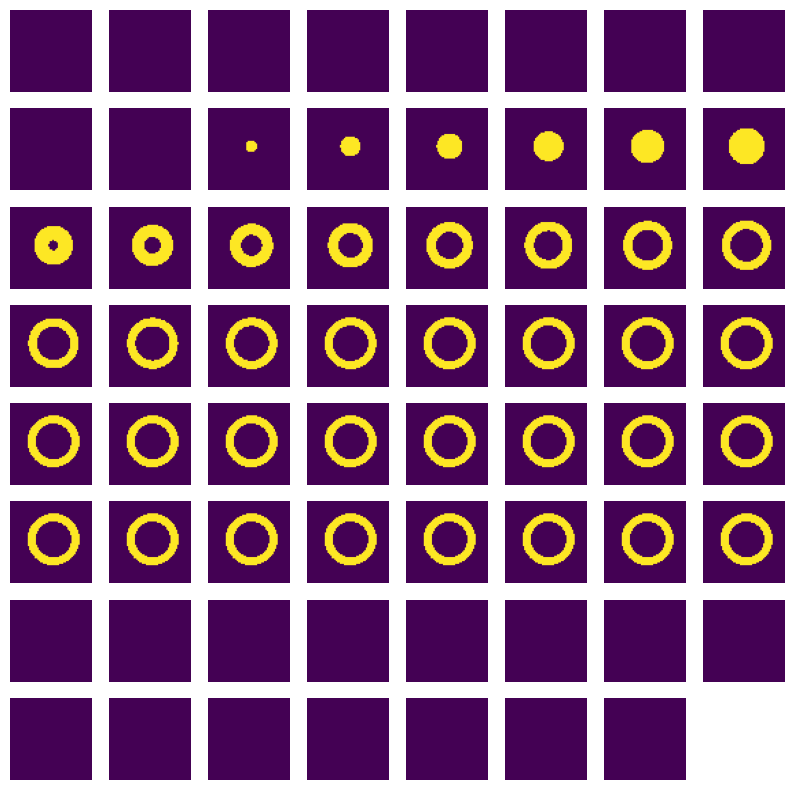

In [2]:
from cardiac.segment.sub_func import generate_lv_model_mask3d

param = {
    "center": {
        "cy": 27.536918278938074,
        "cx": 31.363744708347898
    },
    "radius": 16.0,
    "apex_z": 10,
    "base_z": 47,
    "dividing_z": 28.5
}

img3d = np.zeros((63, 60, 60))
mask = generate_lv_model_mask3d(img3d, param)



plt.figure(figsize=(10, 10))
for i in range(63):
    ax = plt.subplot(8, 8, i+1)
    plt.imshow(mask[i])
    ax.set_axis_off()


In [3]:
fingerprint_filepath = r"D:\workspace\SPECT_project\fingerprint.json"

with open(fingerprint_filepath, "r") as f:
    fingerprint = json.load(f)
# fingerprint

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\workspace\\SPECT_project\\fingerprint.json'

In [ ]:
# 000149118 -> Patient_0000
# 000652515 -> Patient_0002
# 002475009 -> Patient_0014
# 600360681 -> Patient_0077
# 600860468 -> Patient_0102

case_info = fingerprint["Patient_0000"]

sitk_img = sitk.ReadImage(case_info["Polar_img"][0].replace("/mnt/labnas/", "Y:\\labspace\\"))
polar_img = sitk.GetArrayFromImage(sitk_img)[0]

plt.imshow(polar_img)
print(polar_img.min(), polar_img.max(), polar_img.mean(), polar_img.shape)